In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbv3api as tm

### DATA COLLECTION

In [592]:
#year-15
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2015").content
data_15 = pd.read_html(html)
#data_15 = data_15[1][["Title","Director","Cast"]]
data_15 = pd.concat(data_15[0:2])

In [164]:
#year - 16
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2016").content
data_16 = pd.read_html(html)
data_16 = pd.concat([data_16[1],data_16[2]])
#data_16=data_16[["Title","Director","Cast"]]

In [165]:
#year - 17
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2017").content
data_17 = pd.read_html(html)
data_17 = pd.concat(data_17[4:8])
#data_17 = data_17[["Title","Director","Cast"]]

In [166]:
#year -18
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2018").content
data_18 = pd.read_html(html)
data_18 = pd.concat(data_18[1:5])
#data_18 = data_18[["Title","Director","Cast"]].dropna()

In [167]:
#year 19
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2019").content
data_19 = pd.read_html(html)
data_19 = pd.concat(data_19[2:6])
#data_19 = data_19[["Title","Director","Cast"]]

In [259]:
#year 20 
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2020").content
data_20 = pd.read_html(html)[1:]
data_20 = pd.concat([data_20[0],data_20[1],data_20[2],data_20[3]])
#data_20=data_20[["Title","Director","Cast"]]
#data_20.dropna(inplace = True)

In [260]:
#year 21
html = requests.get("https://en.wikipedia.org/wiki/List_of_Tamil_films_of_2021").content
data_21 = pd.read_html(html)
data_21 = pd.concat(data_21[5:9])

### EDA

In [261]:
def analysis(data,year):
    data = data[["Opening","Title"]].dropna()
    gby = data.groupby(by = "Opening")
    count = gby.count().reset_index()
    count = count.rename({"Opening":"Release Month","Title":"Movies"},axis = 1)
    total = count["Movies"].sum()
    #return total
    plt.figure(figsize=(10,5))

    plt.barh(y = count["Release Month"],width = count["Movies"],
                    label = "Total Movies Released in {}----> {}".format(year,total))
    plt.legend(bbox_to_anchor = (1,1))

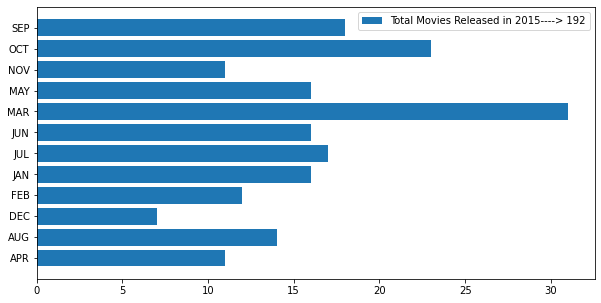

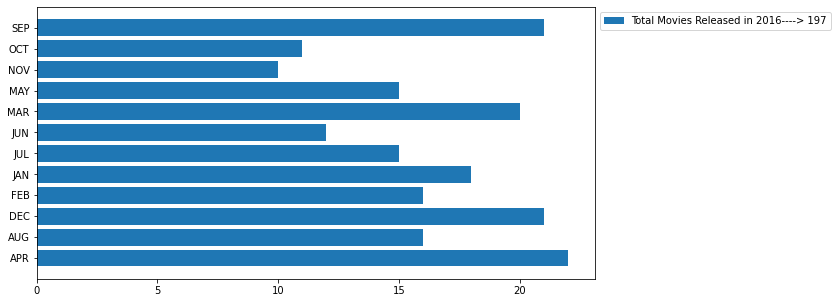

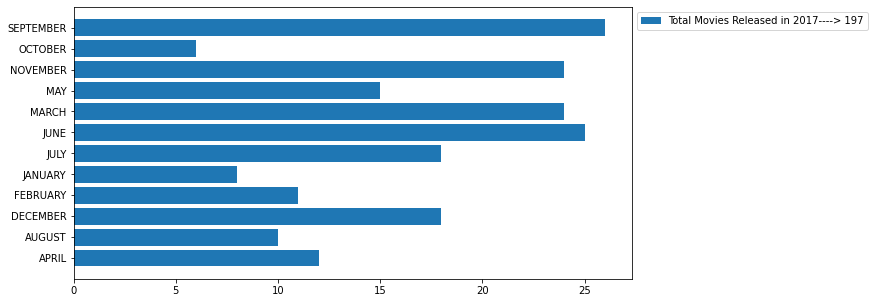

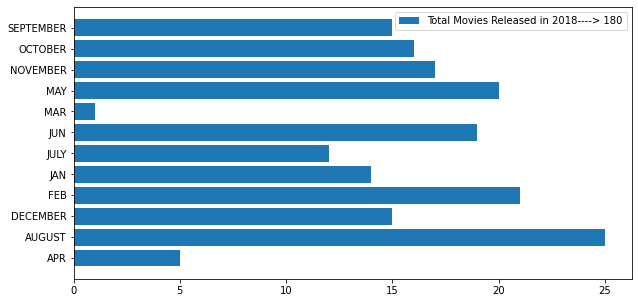

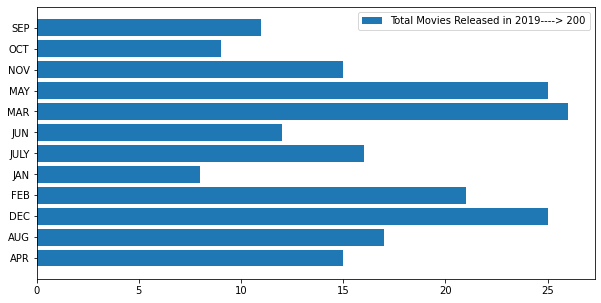

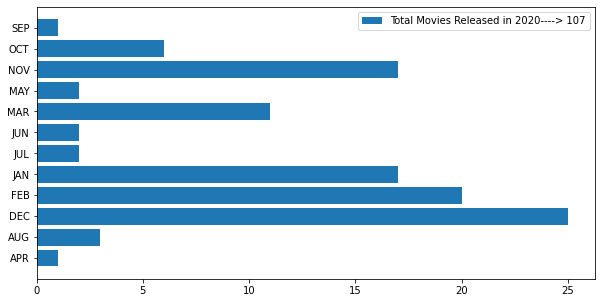

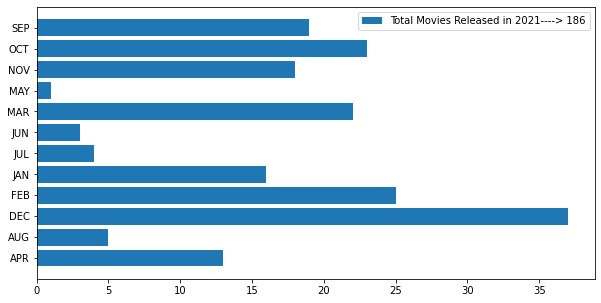

In [263]:
c = 2015
for i in [data_15,data_16,data_17,data_18,data_19,data_20,data_21]:
    analysis(i,c)
    c+=1

In [281]:
movies = pd.concat([data_15,data_16,data_17,data_18,data_19,data_20])

In [285]:
def clean(data):
    cleaned = []
    for i in data:
        cleaned.append(i[["Title","Director","Cast"]].dropna())   
    return pd.concat(cleaned)

In [287]:
flims = clean([data_15,data_16,data_17,data_18,data_19,data_20,data_21])

In [322]:
#flims.to_csv("flims.csv")

In [330]:
#flims[:50].to_csv("fifty.csv")

In [373]:
def fetch_id(data,api):
    tmdb = tm.TMDb()
    tmdb.api_key = api
    movie = tm.Movie()
    movie_id = {}
    for movies in data["Title"].values:
        title = movies
        for i in range(1,501):
            search = movie.search(title,page = i)
            if (i == 1) and len(search) == 0:
                movie_id[title] = "unknown" 
                break
            if len(search) == 0:
                break
            else:
                for re in search:
                    if title.lower() == re["title"].lower():
                        movie_id[title] = re.id
                        break
                    else:
                        continue
        else:         
            movie_id[title] = "unknown" 
            
    return movie_id

In [374]:
import timeit

start = timeit.default_timer()

ids = fetch_id(data = flims,api = "72e7e0f7ee11ebdc1650e3fd64deb609" )

stop = timeit.default_timer()

print('Time: ', stop - start)  


Time:  2883.2657354999974


In [382]:
len(ids)#nearly hundred movies are missing due to mismatch of names spelling

1140

In [392]:
id_data = pd.DataFrame(data = ids.values(),index = ids.keys(),columns = ['TMDB_id'])

In [395]:
id_data = id_data.reset_index()

In [397]:
new = pd.merge(left = id_data,right = flims,left_on="index",right_on="Title",how = "right")

In [466]:
new.drop(["index"],axis=1,inplace = True)

In [467]:
new.isnull().sum()#118 id are missing

TMDB_id     118
Title         0
Director      0
Cast          0
dtype: int64

In [469]:
#new[new.isnull()["index"]].to_csv("na.csv")

In [470]:
new[new.isnull()["TMDB_id"]]['Title'].values

array(['Tamizhuku En Ondrai Azhuthavum', 'Ivanuku Thannila Gandam',
       'Patra', 'Chennai Ungalai Anbudan Varaverkirathu',
       'O Kadhal Kanmani', 'Masss', 'Buddhanin Sirippu', 'Achaaram',
       'Baahubali: The Beginning', 'Vanna Jigina', 'Bhanu',
       'Kaththukkutti', 'Athiradi', 'Naanum Rowdy Dhaan',
       'Thoongaa Vanam', 'Vedalam', 'Karai Oram', 'Saagasam',
       'Kadhalum Kadandhu Pogum', 'Katha Solla Porom', 'Marudhu',
       'Onbathilirindhu Pathu Varai', 'Mudinja Ivana Pudi', 'Aasi',
       'Kallattam', 'Pattathaari', 'Chennai 600028 II', 'Ner Mugam',
       'Si3', 'Pagadi Aattam', 'Kattappava Kanom',
       'Baahubali: The Conclusion', 'Thirappu Vizha', 'Thangaratham',
       'Ivan Yarendru Therikiratha', 'Podhuvaga Emmanasu Thangam',
       'Velaiilla Pattadhari 2', 'Puriyatha Puthir',
       'Ka Ka Ka: Aabathin Arikuri', 'Pichuva Kaththi', 'Valla Desam',
       'Neri', 'Nenjil Thunivirundhal', 'Rukku', 'Aangila Padam',
       '13 December', 'Vidhi Madhi Ultaa', '

In [425]:
mismatch = {}
mismatch['Tamizhuku En Ondrai Azhuthavum'] = 280084
mismatch['Ivanuku Thannila Gandam'] = 330402
mismatch["Chennai Ungalai Anbudan Varaverkirathu"] = 330424
mismatch['Masss'] = 329134


In [471]:
 def clean_mis(data):
    tmdb = tm.TMDb()
    tmdb.api_key = "72e7e0f7ee11ebdc1650e3fd64deb609"
    movie = tm.Movie()
    movies = {}
    for m in data["Title"].values:
        title = m
        search = movie.search(title)
        if len(search) == 1:
            movies[title] = search[0]['id']
    return movies

In [428]:
mis_ids = clean_mis(new[new.isnull()["TMDB_id"]])

In [430]:
len(mis_ids)

88

In [535]:
new.head(10)

,TMDB_id,Title,Director,Cast
0,unknown,Thiru Vi Ka Poonga,Senthil,"Senthil, Swathi Shanmugam"
1,unknown,Virudhalaam Pattu,R. Jayakanthan,"Hemanth Kumar, Saniya Srivastav"
2,324321,Vishayam Veliye Theriya Koodadhu,A. Raagaventira,"Sentrayan, Ranga"
3,unknown,Kizhakke Udhiththa Kaadhal,K. Muni Shankar,"Aariyan, Lisha, Sumalatha"
4,unknown,Vettaiyadu,K. S. Vijayabalan,"Vidiyal Raju, Udhayathara, Hari, Prajwal Poovaiah"
5,unknown,I,Shankar,"Vikram, Amy Jackson, Suresh Gopi, Upen Patel"
6,318572,Aambala,Sundar C.,"Vishal, Hansika Motwani, Prabhu"
7,634994,Darling,Sam Anton,"G. V. Prakash Kumar, Nikki Galrani, Karunas, S..."
8,unknown,Appavi Kateri,Ali Akbar,"Rafiq, Meera, Vimal"
9,unknown,Aroopam,Vincent Jayaraj,"Deva, Darshitha"


In [478]:
mis_ids

{'Tamizhuku En Ondrai Azhuthavum': 280084,
 'Ivanuku Thannila Gandam': 330402,
 'Chennai Ungalai Anbudan Varaverkirathu': 330424,
 'Buddhanin Sirippu': 344157,
 'Achaaram': 345540,
 'Baahubali: The Beginning': 256040,
 'Vanna Jigina': 356515,
 'Kaththukkutti': 363182,
 'Athiradi': 80276,
 'Naanum Rowdy Dhaan': 320910,
 'Thoongaa Vanam': 363178,
 'Vedalam': 362150,
 'Karai Oram': 369376,
 'Saagasam': 280049,
 'Kadhalum Kadandhu Pogum': 387252,
 'Katha Solla Porom': 408467,
 'Onbathilirindhu Pathu Varai': 408209,
 'Mudinja Ivana Pudi': 389952,
 'Kallattam': 422285,
 'Pattathaari': 430620,
 'Chennai 600028 II': 410562,
 'Ner Mugam': 433253,
 'Si3': 376440,
 'Pagadi Aattam': 442413,
 'Kattappava Kanom': 411280,
 'Baahubali: The Conclusion': 350312,
 'Thirappu Vizha': 866520,
 'Thangaratham': 461845,
 'Ivan Yarendru Therikiratha': 464004,
 'Podhuvaga Emmanasu Thangam': 461307,
 'Velaiilla Pattadhari 2': 456017,
 'Puriyatha Puthir': 270780,
 'Ka Ka Ka: Aabathin Arikuri': 482247,
 'Pichuva Ka

In [497]:
def insert(data,dicts):
    indeces = []
    for i in dicts:
        #data[data['Title']==i].fillna(dicts[i],inplace=True)
        indeces.append(data[data['Title']==i]["TMDB_id"].index.values[0] )
    return indeces

In [499]:
val = insert(new,mis_ids)

In [509]:
mis_ids.values()

dict_values([280084, 330402, 330424, 344157, 345540, 256040, 356515, 363182, 80276, 320910, 363178, 362150, 369376, 280049, 387252, 408467, 408209, 389952, 422285, 430620, 410562, 433253, 376440, 442413, 411280, 350312, 866520, 461845, 464004, 461307, 456017, 270780, 482247, 477448, 477239, 411304, 370849, 495105, 521858, 443810, 505687, 508705, 412455, 540108, 542089, 66534, 505906, 493107, 80826, 412862, 553676, 564144, 497227, 577757, 579185, 602142, 610301, 634040, 412076, 480852, 304760, 617251, 681645, 281831, 745275, 751494, 828827, 597501, 63669, 789075, 804580, 796104, 795158, 536425, 808868, 822821, 606517, 766425, 616123, 900042, 620769, 911560, 914032, 494918, 518590, 610265, 613662, 919229])

In [512]:
new.at[37,"Title"]

'Ivanuku Thannila Gandam'

In [513]:
for i,z in zip(mis_ids.values(),val):
    new.at[z,"TMDB_id"] =i  

In [522]:
na_in = new[new.isnull()["TMDB_id"]].index.values

In [525]:
na_in

array([  51,   65,   84,  133,  277,  341,  538,  553,  587,  647,  679,
        692,  713,  719,  758,  759,  768,  886,  933,  957,  964,  965,
        972,  982,  996, 1008, 1070, 1103, 1194, 1248], dtype=int64)

In [566]:
#manual
new.at[65,"TMDB_id"] = 329135
new.at[84,"TMDB_id"] = 329134
new.at[277,"TMDB_id"] = 371429
new.at[533,"TMDB_id"] = 477234
new.at[647,"TMDB_id"] = 460549
new.at[692,"TMDB_id"] = 278358
new.at[719,"TMDB_id"] = 441717
new.at[768,"TMDB_id"] = 572461
new.at[965,"TMDB_id"] = 663174
new.at[996,"TMDB_id"] = 612644
new.at[5,"TMDB_id"] = 263471


In [568]:
new.isnull().sum()

TMDB_id     21
Title        0
Director     0
Cast         0
dtype: int64

In [570]:
new.dropna(inplace = True)

In [ ]:
a = ["u","1"]

In [33]:
def con(x):
    try:
        return int(x)
    except:
        return x

In [578]:
new["TMDB_id"] = new["TMDB_id"].apply(lambda x: con(x))

In [599]:
new.to_csv("new2.csv")

In [262]:
new = pd.read_csv("new2.csv").drop(["Unnamed: 0"],axis=1)

In [263]:
new["TMDB_id"] = new["TMDB_id"].apply(lambda x: con(x))

In [260]:
def get_overview_genre(data) :
    overview = []
    genre = []
    for id in data['TMDB_id'].values:
        if type(id) == int:
            rep = requests.get("https://api.themoviedb.org/3/movie/{}?api_key=72e7e0f7ee11ebdc1650e3fd64deb609".format(id))
            overview.append(rep.json()["overview"])
            p = []
            for i in range(len(rep.json()['genres'])):
                p.append(rep.json()['genres'][i]["name"])
            genre.append(" ".join(p))
        else:
            overview.append("unknown")
            genre.append("unknown")
    return overview,genre

In [36]:
new1 = get_overview_genre(new)

In [296]:
new.at[1061,"TMDB_id"] = 626392

In [299]:
new1[0][1061] = "An alcoholic professor is sent to a juvenile school, where he clashes with a gangster, who uses the children of the school for criminal activities."

In [300]:
new["overview"] = new1[0]

In [301]:
new["genre"] = new1[1]

In [302]:
#new["Cast"] = new['Cast'].apply(lambda x: "".join(x.split(",")))

In [303]:
#new["Director"] = new["Director"].apply(lambda x: "".join(x.split(",")))

In [304]:
new['actorname_1'] = new['Cast'].apply(lambda x: x.split(",")[0])

In [305]:
def act1(x):
    if len(x.split(","))>1:
        return x.split(",")[1]
    else:
        return "unknown"

In [306]:
def act2(x):
    if len(x.split(","))>2:
        return x.split(",")[2]
    else:
        return "unknown"

In [307]:
new['actorname_2'] = new['Cast'].apply(lambda x:act1(x)) 

In [308]:
new['actorname_3'] = new['Cast'].apply(lambda x:act2(x)) 

In [548]:
new["tag_all"] = new["overview"]+" "+new["genre"]+" "+new["Director"]+" "+new["actorname_1"]+" "+new["actorname_2"]+" "+new["actorname_3"]

In [338]:
#new["tag"] = new["overview"]+" "+new["genre"]+" "+new["Director"]+" "+new["actorname_1"]

In [549]:
new["tag_1"] =new["genre"]+" "+new["Director"]+" "+new["actorname_1"]+" " +new["overview"]

In [572]:
new["tag_2"] =new["genre"]+" "+new["Director"]+" "+new["actorname_1"]+" "+new["actorname_2"]

In [552]:
new.to_csv("data_15_21.csv")

In [553]:
final = pd.read_csv("data_15_21.csv").drop(['Unnamed: 0'],axis=1)

### STEMING

In [564]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [565]:
def remove_punc(x):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    p = x
    for i in punc: 
        if i in x:
            p = x.replace(i," ")
    return p
            

In [566]:
#final["tag"] = final['tag'].apply(lambda x: remove_punc(x))

In [567]:
import nltk
nltk.download('punkt')
  
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem(x):
    ps = PorterStemmer()
    words = word_tokenize(x)
    s = []
    for w in words:
        s.append(ps.stem(w))
    return " ".join(s)
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91882\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [568]:
final['tag_stem'] = final['tag'].apply(lambda x: stem(x))

In [569]:
final2 = final.fillna('unknown')

In [570]:
final2 = final2.drop_duplicates()

## VECTORIZE

### Different tags for different results
* tag_all - overview	genre	actorname_1	actorname_2	actorname_3	Director
* tag_1 - overview	genre	actorname_1 Director
* tag_2 - genre	actorname_1 actorname_2 Director

In [573]:
final2.head()

,TMDB_id,Title,Director,Cast,overview,genre,actorname_1,actorname_2,actorname_3,tag,tag_all,tag_1,tag_2,tag_stem
0,unknown,Thiru Vi Ka Poonga,Senthil,"Senthil, Swathi Shanmugam",unknown,unknown,Senthil,Swathi Shanmugam,unknown,unknown Senthil Senthil unknown,unknown unknown Senthil Senthil Swathi Shanmu...,unknown Senthil Senthil unknown,unknown Senthil Senthil unknown,unknown senthil senthil unknown
1,unknown,Virudhalaam Pattu,R. Jayakanthan,"Hemanth Kumar, Saniya Srivastav",unknown,unknown,Hemanth Kumar,Saniya Srivastav,unknown,unknown R. Jayakanthan Hemanth Kumar unknown,unknown unknown R. Jayakanthan Hemanth Kumar ...,unknown R. Jayakanthan Hemanth Kumar unknown,unknown R. Jayakanthan Hemanth Kumar unknown,unknown R. jayakanthan hemanth kumar unknown
2,324321,Vishayam Veliye Theriya Koodadhu,A. Raagaventira,"Sentrayan, Ranga","Tamil movie, Directed by Raghavendra, Starring...",Comedy Drama,Sentrayan,Ranga,unknown,Comedy Drama A. Raagaventira Sentrayan unknown,"Tamil movie, Directed by Raghavendra, Starring...",Comedy Drama A. Raagaventira Sentrayan Tamil m...,Comedy Drama A. Raagaventira Sentrayan unknown,comedi drama A. raagaventira sentrayan unknown
3,unknown,Kizhakke Udhiththa Kaadhal,K. Muni Shankar,"Aariyan, Lisha, Sumalatha",unknown,unknown,Aariyan,Lisha,Sumalatha,unknown K. Muni Shankar Aariyan Sumalatha,unknown unknown K. Muni Shankar Aariyan Lisha...,unknown K. Muni Shankar Aariyan unknown,unknown K. Muni Shankar Aariyan Sumalatha,unknown K. muni shankar aariyan sumalatha
4,unknown,Vettaiyadu,K. S. Vijayabalan,"Vidiyal Raju, Udhayathara, Hari, Prajwal Poovaiah",unknown,unknown,Vidiyal Raju,Udhayathara,Hari,unknown K. S. Vijayabalan Vidiyal Raju Hari,unknown unknown K. S. Vijayabalan Vidiyal Raju...,unknown K. S. Vijayabalan Vidiyal Raju unknown,unknown K. S. Vijayabalan Vidiyal Raju Hari,unknown K. S. vijayabalan vidiy raju hari


In [574]:
from sklearn.feature_extraction.text import CountVectorizer

In [575]:
vectorizer = CountVectorizer(stop_words="english")

In [577]:
vectors = vectorizer.fit_transform(final2['tag_2']).toarray()

In [578]:
vectors.shape

(1238, 2062)

### Cosine Similarity

In [579]:
from sklearn.metrics.pairwise import cosine_similarity

In [580]:
similarity = cosine_similarity(vectors)

In [581]:
similarity.shape

(1238, 1238)

In [582]:
final[final["Title"]=="Vada Chennai"].index[0]

722

In [583]:
sims = similarity[final[final["Title"]=="Vada Chennai"].index[0]]

In [584]:
def recommend(movie):
    index = final2[final2['Title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(final2.iloc[i[0]].Title)

In [591]:
recommend("Soorarai Pottru")

Irudhi Suttru
Aayirathil Iruvar
Kaappaan
Killadi
Purampokku Engira Podhuvudamai


In [593]:
final2.head()

,TMDB_id,Title,Director,Cast,overview,genre,actorname_1,actorname_2,actorname_3,tag,tag_all,tag_1,tag_2,tag_stem
0,unknown,Thiru Vi Ka Poonga,Senthil,"Senthil, Swathi Shanmugam",unknown,unknown,Senthil,Swathi Shanmugam,unknown,unknown Senthil Senthil unknown,unknown unknown Senthil Senthil Swathi Shanmu...,unknown Senthil Senthil unknown,unknown Senthil Senthil unknown,unknown senthil senthil unknown
1,unknown,Virudhalaam Pattu,R. Jayakanthan,"Hemanth Kumar, Saniya Srivastav",unknown,unknown,Hemanth Kumar,Saniya Srivastav,unknown,unknown R. Jayakanthan Hemanth Kumar unknown,unknown unknown R. Jayakanthan Hemanth Kumar ...,unknown R. Jayakanthan Hemanth Kumar unknown,unknown R. Jayakanthan Hemanth Kumar unknown,unknown R. jayakanthan hemanth kumar unknown
2,324321,Vishayam Veliye Theriya Koodadhu,A. Raagaventira,"Sentrayan, Ranga","Tamil movie, Directed by Raghavendra, Starring...",Comedy Drama,Sentrayan,Ranga,unknown,Comedy Drama A. Raagaventira Sentrayan unknown,"Tamil movie, Directed by Raghavendra, Starring...",Comedy Drama A. Raagaventira Sentrayan Tamil m...,Comedy Drama A. Raagaventira Sentrayan unknown,comedi drama A. raagaventira sentrayan unknown
3,unknown,Kizhakke Udhiththa Kaadhal,K. Muni Shankar,"Aariyan, Lisha, Sumalatha",unknown,unknown,Aariyan,Lisha,Sumalatha,unknown K. Muni Shankar Aariyan Sumalatha,unknown unknown K. Muni Shankar Aariyan Lisha...,unknown K. Muni Shankar Aariyan unknown,unknown K. Muni Shankar Aariyan Sumalatha,unknown K. muni shankar aariyan sumalatha
4,unknown,Vettaiyadu,K. S. Vijayabalan,"Vidiyal Raju, Udhayathara, Hari, Prajwal Poovaiah",unknown,unknown,Vidiyal Raju,Udhayathara,Hari,unknown K. S. Vijayabalan Vidiyal Raju Hari,unknown unknown K. S. Vijayabalan Vidiyal Raju...,unknown K. S. Vijayabalan Vidiyal Raju unknown,unknown K. S. Vijayabalan Vidiyal Raju Hari,unknown K. S. vijayabalan vidiy raju hari


In [594]:
final2.to_csv("final_15_21.csv")